In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
amazon = pd.read_csv(r'Amazon.csv')

C:\Users\alexi\AppData\Local\Temp\ipykernel_21480\1711251628.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon = pd.read_csv(r'Amazon.csv')


In [3]:
amazon.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
amazon.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [5]:
amazon["Category"].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [6]:
df = amazon

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [8]:
df["Category"].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [9]:
df.rename(columns={'Sales Channel ': 'Sales_Channel'}, inplace=True)

In [10]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales_Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [11]:
df["Sales_Channel"].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [12]:
df = df[df["Sales_Channel"].str.contains('Amazon.in')]
# Centro mi analisis a aquellas ventas realizadas solo mediante el canal Amazon.in

In [13]:
el = ['Sales_Channel']
df = df.drop(el, axis=1)
# Esta columna no la voy necesitar por lo cual la quito

In [14]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [15]:
df["Amount"].unique()

array([ 647.62,  406.  ,  329.  , ...,  708.58, 1244.  ,  639.  ])

In [16]:
df = df[df['Amount'] <= 500]
""" Investigo que el sueldo minimo y vital de la India gira entorno a las 5.000 rupias mensuales por lo cual estabezco como corte las operaciones realizadas por una cantidad igual ó inferior al 10% del salario minimo y vital, es decir 500 rupias """

' Investigo que el sueldo minimo y vital de la India gira entorno a las 5.000 rupias mensuales por lo cual estabezco como corte las operaciones realizadas por una cantidad igual ó inferior al 10% del salario minimo y vital, es decir 500 rupias '

In [17]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN
11,11,171-4638481-6326716,04-30-22,Shipped,Amazon,Expedited,JNE3500,JNE3500-KR-XS,kurta,XS,B098117DJ3,Shipped,1,INR,364.0,NOIDA,UTTAR PRADESH,201303.0,IN,NaN,False,NaN,NaN


In [18]:
df["ship-state"].unique()

array(['KARNATAKA', 'MAHARASHTRA', 'TELANGANA', 'TAMIL NADU',
       'UTTAR PRADESH', 'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM',
       'CHHATTISGARH', 'KERALA', 'ODISHA', 'WEST BENGAL', 'Gujarat',
       'MADHYA PRADESH', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'PUNJAB',
       'UTTARAKHAND', 'ANDHRA PRADESH', 'GOA', 'BIHAR', 'MEGHALAYA',
       'JHARKHAND', 'DADRA AND NAGAR', 'PUDUCHERRY', 'TRIPURA', nan,
       'SIKKIM', 'ANDAMAN & NICOBAR ', 'MANIPUR', 'CHANDIGARH', 'Manipur',
       'Delhi', 'Goa', 'NAGALAND', 'punjab', 'MIZORAM', 'Rajasthan',
       'ARUNACHAL PRADESH', 'New Delhi', 'rajasthan', 'Odisha', 'Bihar',
       'delhi', 'LADAKH', 'Punjab', 'Chandigarh', 'goa', 'PB', 'RJ', 'AR',
       'Arunachal pradesh', 'NL', 'Orissa', 'Rajsthan', 'Meghalaya'],
      dtype=object)

In [19]:
df = df[df['ship-state'].isin(['KARNATAKA', 'MAHARASHTRA', 'TELANGANA', 'TAMIL NADU'])]
# centro mi analis a las ventas enviada a estos 4 estados

In [20]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3405,JNE3405-KR-XS,kurta,XS,B081XCMYXJ,Shipped,1,INR,399.0,Amravati.,MAHARASHTRA,444606.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22637 entries, 1 to 128945
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               22637 non-null  int64         
 1   Order ID            22637 non-null  object        
 2   Date                22637 non-null  datetime64[ns]
 3   Status              22637 non-null  object        
 4   Fulfilment          22637 non-null  object        
 5   ship-service-level  22637 non-null  object        
 6   Style               22637 non-null  object        
 7   SKU                 22637 non-null  object        
 8   Category            22637 non-null  object        
 9   Size                22637 non-null  object        
 10  ASIN                22637 non-null  object        
 11  Courier Status      21741 non-null  object        
 12  Qty                 22637 non-null  int64         
 13  currency            22637 non-null  object   

In [24]:
df["fulfilled-by"].unique()

array(['Easy Ship', nan], dtype=object)

In [25]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [26]:
columnas_a_eliminar = ['Order ID', 'SKU', 'ASIN', 'currency', 'ship-postal-code', 'ship-country', 'promotion-ids', 'fulfilled-by', 'Unnamed: 22']
df = df.drop(columnas_a_eliminar, axis=1)
# Estas columnas no me aportan valor a mi analisis por lo cual las elimino

In [27]:
df.head()

,index,Date,Status,Fulfilment,ship-service-level,Style,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B
1,1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,False
2,2,2022-04-30,Shipped,Amazon,Expedited,JNE3371,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,True
7,7,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3405,kurta,S,Shipped,1,399.0,HYDERABAD,TELANGANA,False
9,9,2022-04-30,Shipped,Amazon,Expedited,JNE3461,kurta,XXL,Shipped,1,363.0,Chennai,TAMIL NADU,False
12,12,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3405,kurta,XS,Shipped,1,399.0,Amravati.,MAHARASHTRA,False


In [28]:
df["Status"].unique()

array(['Shipped - Delivered to Buyer', 'Shipped', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Lost in Transit',
       'Shipped - Rejected by Buyer', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Picked Up',
       'Shipped - Out for Delivery', 'Shipped - Returning to Seller'],
      dtype=object)

Esta columna tampoco me va a aportar valor a mi analisis por lo cual la elimino

In [29]:
eliminar = ['Style']
df = df.drop(eliminar, axis=1)

In [30]:
df.head()

,index,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B
1,1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,False
2,2,2022-04-30,Shipped,Amazon,Expedited,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,True
7,7,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,S,Shipped,1,399.0,HYDERABAD,TELANGANA,False
9,9,2022-04-30,Shipped,Amazon,Expedited,kurta,XXL,Shipped,1,363.0,Chennai,TAMIL NADU,False
12,12,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,XS,Shipped,1,399.0,Amravati.,MAHARASHTRA,False


In [31]:
df = df[df['Amount'] != 0]

In [32]:
df.Amount.describe()

count    21531.000000
mean       404.982226
std         62.665784
min        199.000000
25%        359.000000
50%        399.000000
75%        459.000000
max        499.000000
Name: Amount, dtype: float64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21531 entries, 1 to 128945
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               21531 non-null  int64         
 1   Date                21531 non-null  datetime64[ns]
 2   Status              21531 non-null  object        
 3   Fulfilment          21531 non-null  object        
 4   ship-service-level  21531 non-null  object        
 5   Category            21531 non-null  object        
 6   Size                21531 non-null  object        
 7   Courier Status      20635 non-null  object        
 8   Qty                 21531 non-null  int64         
 9   Amount              21531 non-null  float64       
 10  ship-city           21531 non-null  object        
 11  ship-state          21531 non-null  object        
 12  B2B                 21531 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), in

In [34]:
df["Courier Status"].unique()

array(['Shipped', nan, 'Unshipped'], dtype=object)

Esta columna tampoco me va a aportar valor a mi analisis por lo cual la elimino

In [35]:
elim = ['Courier Status']
df = df.drop(elim, axis=1)

In [36]:
df.head()

,index,Date,Status,Fulfilment,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
1,1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,1,406.0,BENGALURU,KARNATAKA,False
2,2,2022-04-30,Shipped,Amazon,Expedited,kurta,XL,1,329.0,NAVI MUMBAI,MAHARASHTRA,True
7,7,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,S,1,399.0,HYDERABAD,TELANGANA,False
9,9,2022-04-30,Shipped,Amazon,Expedited,kurta,XXL,1,363.0,Chennai,TAMIL NADU,False
12,12,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,XS,1,399.0,Amravati.,MAHARASHTRA,False


In [37]:
fecha_mas_antigua = df['Date'].min()
fecha_mas_antigua

Timestamp('2022-03-31 00:00:00')

In [38]:
fecha_mas_reciente = df['Date'].max()
fecha_mas_reciente

Timestamp('2022-06-29 00:00:00')

Centro mi analisis a el segundo trimestre del 2022. Esto son los meses de abril, mayo y junio

In [39]:
df = df[df['Date'] != '2022-03-31']

In [40]:
fecha_mas_antigua = df['Date'].min()
fecha_mas_antigua

Timestamp('2022-04-01 00:00:00')

In [41]:
df.columns

Index(['index', 'Date', 'Status', 'Fulfilment', 'ship-service-level',
       'Category', 'Size', 'Qty', 'Amount', 'ship-city', 'ship-state', 'B2B'],
      dtype='object')

Esta columna tampoco me va a aportar valor a mi analisis por lo cual la elimino

In [42]:
eli = ['index']
df = df.drop(eli, axis=1)

In [43]:
df.head()

,Date,Status,Fulfilment,ship-service-level,Category,Size,Qty,Amount,ship-city,ship-state,B2B
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,1,406.0,BENGALURU,KARNATAKA,False
2,2022-04-30,Shipped,Amazon,Expedited,kurta,XL,1,329.0,NAVI MUMBAI,MAHARASHTRA,True
7,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,S,1,399.0,HYDERABAD,TELANGANA,False
9,2022-04-30,Shipped,Amazon,Expedited,kurta,XXL,1,363.0,Chennai,TAMIL NADU,False
12,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,XS,1,399.0,Amravati.,MAHARASHTRA,False


In [44]:
df.rename(columns={"ship-service-level": "Ship_Service_Level", "ship-city": "Ship_City", "ship-state": "Ship_State"}, inplace=True)

In [45]:
df.columns

Index(['Date', 'Status', 'Fulfilment', 'Ship_Service_Level', 'Category',
       'Size', 'Qty', 'Amount', 'Ship_City', 'Ship_State', 'B2B'],
      dtype='object')

In [46]:
df["Category"] = df["Category"].str.title()
df["Ship_City"] = df["Ship_City"].str.title()
df["Ship_State"] = df["Ship_State"].str.title()

In [47]:
df.head()

,Date,Status,Fulfilment,Ship_Service_Level,Category,Size,Qty,Amount,Ship_City,Ship_State,B2B
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Kurta,3XL,1,406.0,Bengaluru,Karnataka,False
2,2022-04-30,Shipped,Amazon,Expedited,Kurta,XL,1,329.0,Navi Mumbai,Maharashtra,True
7,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Kurta,S,1,399.0,Hyderabad,Telangana,False
9,2022-04-30,Shipped,Amazon,Expedited,Kurta,XXL,1,363.0,Chennai,Tamil Nadu,False
12,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Kurta,XS,1,399.0,Amravati.,Maharashtra,False


In [48]:
df = df.drop(df[df["Qty"] == 0].index)

In [49]:
delete = ['Qty']
df = df.drop(delete, axis=1)

In [50]:
df.head()

,Date,Status,Fulfilment,Ship_Service_Level,Category,Size,Amount,Ship_City,Ship_State,B2B
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Kurta,3XL,406.0,Bengaluru,Karnataka,False
2,2022-04-30,Shipped,Amazon,Expedited,Kurta,XL,329.0,Navi Mumbai,Maharashtra,True
7,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Kurta,S,399.0,Hyderabad,Telangana,False
9,2022-04-30,Shipped,Amazon,Expedited,Kurta,XXL,363.0,Chennai,Tamil Nadu,False
12,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Kurta,XS,399.0,Amravati.,Maharashtra,False


In [51]:
import pylab as plt
#import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8, 6)   # tamaño por defecto, decenas de pixeles
import seaborn as sns
import numpy as np

In [52]:
df.describe(include='object').T

,count,unique,top,freq
Status,20608,11,Shipped,14253
Fulfilment,20608,2,Amazon,15400
Ship_Service_Level,20608,2,Expedited,15389
Category,20608,8,Kurta,17262
Size,20608,11,XL,3696
Ship_City,20608,1391,Bengaluru,3671
Ship_State,20608,4,Maharashtra,7110


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20608 entries, 1 to 128945
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                20608 non-null  datetime64[ns]
 1   Status              20608 non-null  object        
 2   Fulfilment          20608 non-null  object        
 3   Ship_Service_Level  20608 non-null  object        
 4   Category            20608 non-null  object        
 5   Size                20608 non-null  object        
 6   Amount              20608 non-null  float64       
 7   Ship_City           20608 non-null  object        
 8   Ship_State          20608 non-null  object        
 9   B2B                 20608 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(7)
memory usage: 1.6+ MB


In [54]:
df['Amount'] = df['Amount'].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20608 entries, 1 to 128945
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                20608 non-null  datetime64[ns]
 1   Status              20608 non-null  object        
 2   Fulfilment          20608 non-null  object        
 3   Ship_Service_Level  20608 non-null  object        
 4   Category            20608 non-null  object        
 5   Size                20608 non-null  object        
 6   Amount              20608 non-null  int32         
 7   Ship_City           20608 non-null  object        
 8   Ship_State          20608 non-null  object        
 9   B2B                 20608 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int32(1), object(7)
memory usage: 1.5+ MB


In [56]:
is_numeric = pd.to_numeric(df['Amount'], errors='coerce').notnull().all()

if is_numeric:
    print("La columna 'Col1' contiene solo datos numéricos.")
else:
    print("La columna 'Col1' contiene datos no numéricos.")

La columna 'Col1' contiene solo datos numéricos.


In [57]:
df["Fulfilment"].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [58]:
df["Category"].unique()

array(['Kurta', 'Top', 'Set', 'Blouse', 'Western Dress', 'Bottom',
       'Ethnic Dress', 'Dupatta'], dtype=object)

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,20608.0,405.839965,62.226266,199.0,362.0,399.0,459.0,499.0


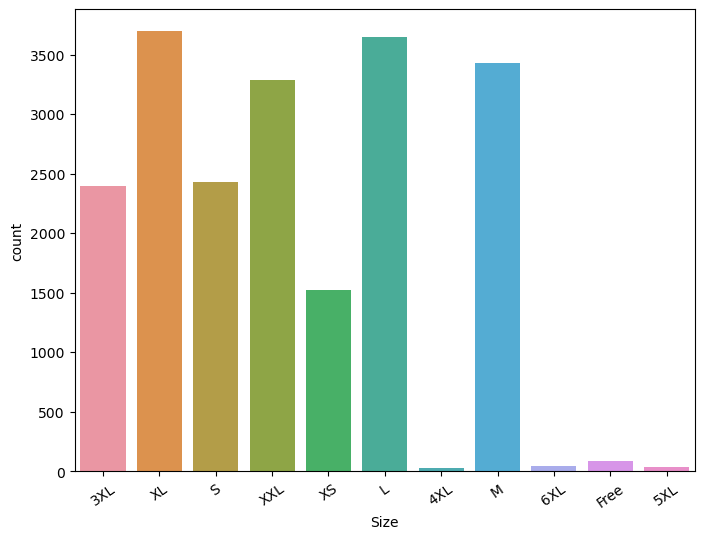

In [60]:
sns.countplot(x=df.Size)

plt.xticks(rotation=35)   # rotar las etiquetas del eje x 35 grados

plt.show();

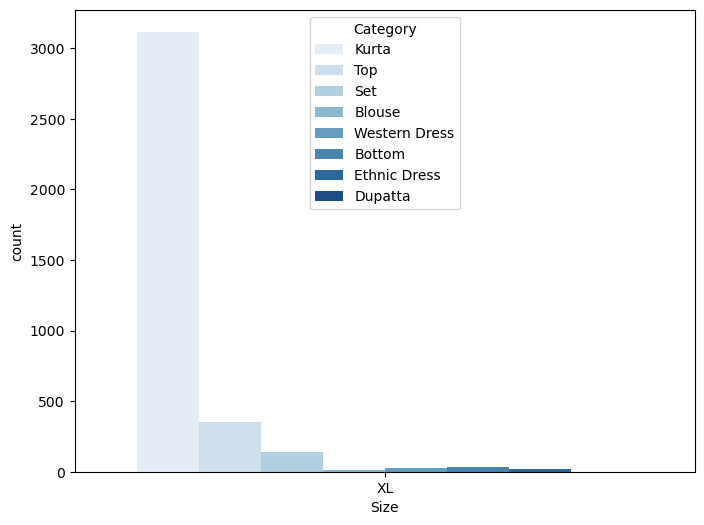

In [61]:
sns.countplot(x=df[df.Size=='XL'].Size,
              hue=df.Category,
              palette='Blues');

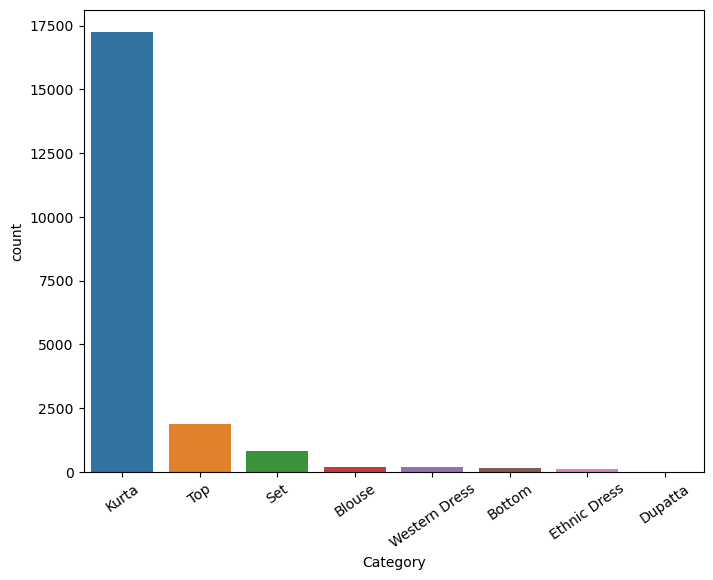

In [62]:
sns.countplot(x=df.Category)

plt.xticks(rotation=35)   # rotar las etiquetas del eje x 35 grados

plt.show();   # cierra el grafico actual, para .py necesario para el siguiente grafico

<AxesSubplot:xlabel='Amount', ylabel='Count'>

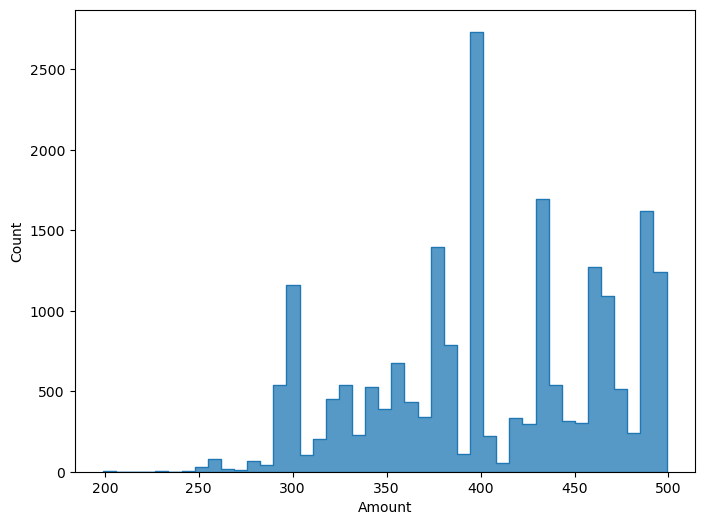

In [63]:
sns.histplot(x=df.Amount,
             element='step'   # es la linea de las barras
            )

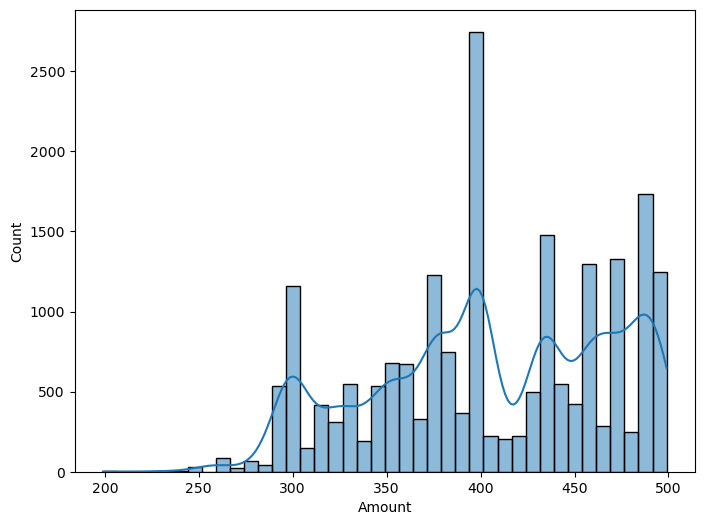

In [64]:
sns.histplot(x=df.Amount,
             bins=40,           # nº de barras
             kde=True           # kde = kernel density estimation, la linea de ajuste
            );

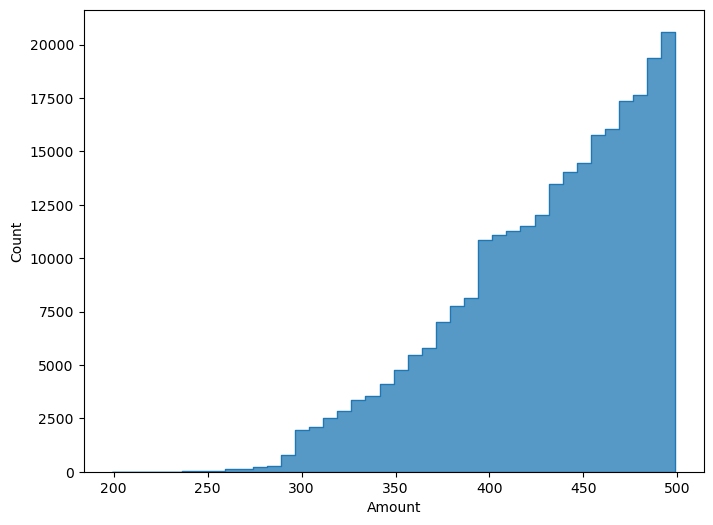

In [65]:
sns.histplot(x=df.Amount, 
             bins=40,
             element='step',   # contorno de la barra
             cumulative=True   # acumulado
            );

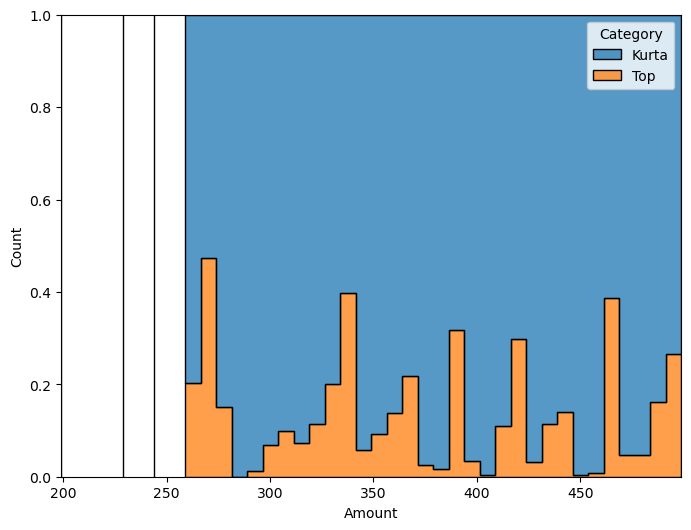

In [66]:
sns.histplot(x=df.Amount, 
             
             hue=df[(df.Category=='Top') | (df.Category=='Kurta')].Category,
             
             bins=40,
             element='step',  # contorno de las barras
             multiple='fill'   # normaliza, entre 0 y 1
             
            );

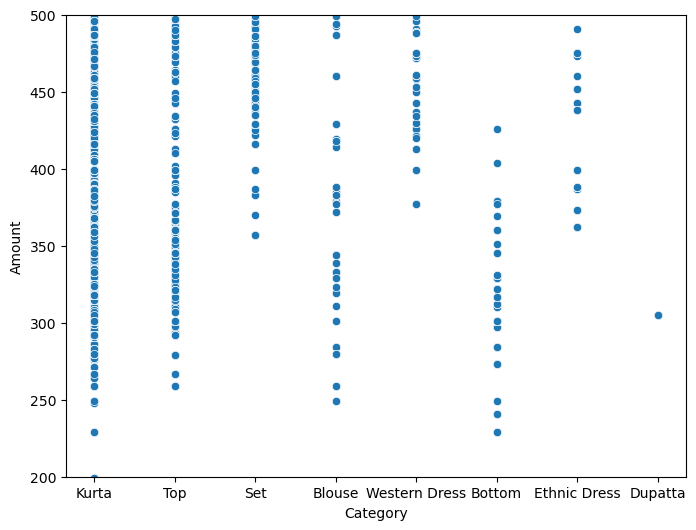

In [67]:
%matplotlib inline

sns.scatterplot(data=df, 
                x='Category', 
                y='Amount')

plt.ylim(200, 500)

plt.show();

In [71]:
df["Status"].unique()

array(['Shipped - Delivered to Buyer', 'Shipped', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Pending', 'Shipped - Lost in Transit',
       'Pending - Waiting for Pick Up', 'Shipped - Picked Up',
       'Shipped - Out for Delivery', 'Shipped - Returning to Seller'],
      dtype=object)

In [73]:
valores_distintos = df["Status"].nunique()
valores_distintos

11

In [77]:
mappings = {
    'Pending - Waiting for Pick Up': 'Pending',
    'Shipped - Delivered to Buyer': 'Shipped',
    'Shipped - Picked Up': 'Shipped',
    'Shipped - Out for Delivery': 'Shipped',
    'Shipped - Returning to Seller': 'Returned',
    'Shipped - Returned to Seller': 'Returned',
    'Shipped - Rejected by Buyer': 'Returned',
    'Shipped - Lost in Transit': 'Lost'
    }

In [78]:
df['Status'] = df['Status'].replace(mappings)

In [85]:
df["Status"].unique()
# agrupo valores en solo 5 categorias ya que tener 11 categorias distintas no me aportaba valor.

array(['Shipped', 'Cancelled', 'Returned', 'Pending', 'Lost'],
      dtype=object)

In [80]:
df.head()

,Date,Status,Fulfilment,Ship_Service_Level,Category,Size,Amount,Ship_City,Ship_State,B2B
1,2022-04-30,Shipped,Merchant,Standard,Kurta,3XL,406,Bengaluru,Karnataka,False
2,2022-04-30,Shipped,Amazon,Expedited,Kurta,XL,329,Navi Mumbai,Maharashtra,True
7,2022-04-30,Shipped,Merchant,Standard,Kurta,S,399,Hyderabad,Telangana,False
9,2022-04-30,Shipped,Amazon,Expedited,Kurta,XXL,363,Chennai,Tamil Nadu,False
12,2022-04-30,Shipped,Merchant,Standard,Kurta,XS,399,Amravati.,Maharashtra,False


In [81]:
df.to_csv("csv/limpio.csv", index = False)
